# Modeling Using 35 Family Classifications

In [1]:
# Imports & Setup:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics


%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import layers

tf.random.set_seed(42)

### Read in Data

In [2]:
# function to load in and process images
def load_image(path):
    images = Image.open(f'./../CUB_200_2011/images/{path}') 
    new_image=images.resize((128,128))
    color_image=new_image.convert("RGB")
    arrays1 = np.asarray(color_image)
    floaters= arrays1.astype('float32')
    floaters2=floaters/255.0
    return floaters2

In [3]:
class_map_dir= pd.read_csv('Tables/class_map_dir_output_new_classes_f.csv')
class_map_dir.head(5)

,F1,Image Id,Image Name,Is Training Image,Class Id,Class Name,Species Gen,Order,Order_Num_Seq,Species,Species_Num_Seq,Family,Family_Num_Seq
0,0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
1,1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
2,2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
3,3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
4,4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11


In [ ]:
class_names=[
"Alaudidae",
"Alcedinidae",
"Alcidae",
"Anatidae",
"Bombycillidae",
"Caprimulgidae",
"Cardinalidae",
"Certhiidae",
"Corvidae",
"Cuculidae",
"Diomedeidae",
"Fregatidae",
"Fringillidae",
"Gaviidae",
"Hirundinidae",
"Icteridae",
"Icteriidae",
"Laniidae",
"Laridae",
"Mimidae",
"Motacillidae",
"Parulidae",
"Passerellidae",
"Pelecanidae",
"Phalacrocoracidae",
"Picidae",
"Podicipedidae",
"Procellariidae",
"Sittidae",
"Stercorariidae",
"Sturnidae",
"Trochilidae",
"Troglodytidae",
"Tyrannidae",
"Vireonidae"]

## Build Neural Networks


#### With train/test split denoted in intial dataset

In [4]:
class_map_dir_train=class_map_dir.loc[class_map_dir['Is Training Image']==1]
list_of_images_train=[load_image(i) for i in class_map_dir_train['Image Name']]
array_of_img_train=np.asarray(list_of_images_train)
list_of_labels_train=class_map_dir_train['Family_Num_Seq']

In [5]:
class_map_dir_test=class_map_dir.loc[class_map_dir['Is Training Image']==0]
list_of_images_test=[load_image(i) for i in class_map_dir_test['Image Name']]
array_of_img_test=np.asarray(list_of_images_test)
list_of_labels_test=class_map_dir_test['Family_Num_Seq']

In [6]:
# sanity check length of train datasets
print(len(list_of_images_train))
print(len(list_of_labels_train))

# sanity check length of test datasets
print(len(list_of_images_test))
print(len(list_of_labels_test))

5994
5994
5794
5794


In [7]:
X_train_alt=array_of_img_train
y_train_alt=list_of_labels_train

X_test_alt=array_of_img_test
y_test_alt=list_of_labels_test

X_train_alt = X_train_alt.reshape(X_train_alt.shape[0], 128, 128, 3)
X_test_alt = X_test_alt.reshape(X_test_alt.shape[0], 128, 128, 3)
y_train_alt = utils.to_categorical(y_train_alt,36)
y_test_alt = utils.to_categorical(y_test_alt,36)


In [8]:
model_alt = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt.add(Flatten(input_shape = (128, 128, 3)))
model_alt.add(Dense(512, activation = 'relu'))
model_alt.add(Dense(512, activation = 'relu'))
model_alt.add(Dense(256, activation = 'relu'))

model_alt.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt  = model_alt.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 15s 508ms/step - loss: 19.6554 - accuracy: 0.0747 - val_loss: 5.5787 - val_accuracy: 0.0787
Epoch 2/50
24/24 [==============================] - 12s 522ms/step - loss: 3.7236 - accuracy: 0.1285 - val_loss: 3.1433 - val_accuracy: 0.1778
Epoch 3/50
24/24 [==============================] - 11s 467ms/step - loss: 3.1181 - accuracy: 0.1810 - val_loss: 3.0409 - val_accuracy: 0.1795
Epoch 4/50
24/24 [==============================] - 11s 461ms/step - loss: 3.0461 - accuracy: 0.1979 - val_loss: 3.0334 - val_accuracy: 0.1987
Epoch 5/50
24/24 [==============================] - 11s 451ms/step - loss: 3.0038 - accuracy: 0.2089 - val_loss: 3.0056 - val_accuracy: 0.2113
Epoch 6/50
24/24 [==============================] - 11s 454ms/step - loss: 2.9767 - accuracy: 0.2165 - val_loss: 3.0090 - val_accuracy: 0.2038
Epoch 7/50
24/24 [==============================] - 12s 491ms/step - loss: 2.9789 - accuracy: 0.2105 - val_loss: 2.9670 - val_accuracy: 0.203

In [9]:
model_alt.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 512)               25166336  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                        

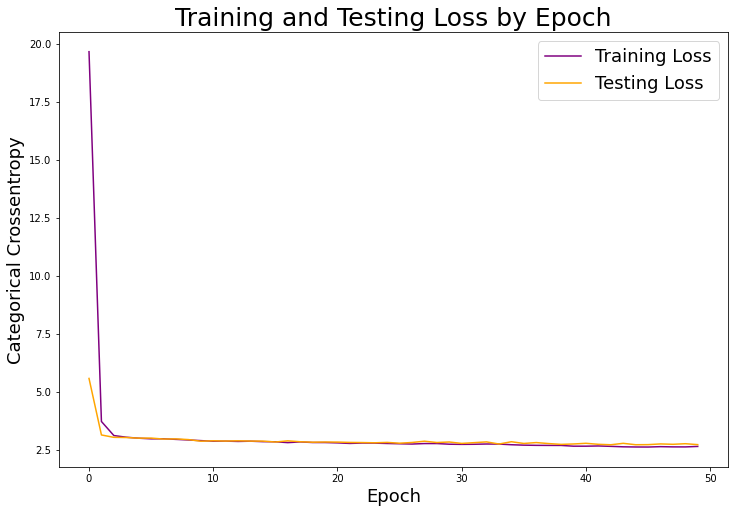

In [10]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt.history['loss']
test_loss = history_alt.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [11]:
model_alt2 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt2.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt2.add(Flatten(input_shape = (128, 128, 3)))
model_alt2.add(Dense(512, activation = 'relu'))
model_alt2.add(Dense(512, activation = 'relu'))
model_alt2.add(Dense(256, activation = 'relu'))

model_alt2.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt2  = model_alt2.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 38s 2s/step - loss: 10.8979 - accuracy: 0.0757 - val_loss: 3.2268 - val_accuracy: 0.1577
Epoch 2/50
24/24 [==============================] - 34s 1s/step - loss: 3.1651 - accuracy: 0.1683 - val_loss: 3.1327 - val_accuracy: 0.1707
Epoch 3/50
24/24 [==============================] - 32s 1s/step - loss: 3.1256 - accuracy: 0.1717 - val_loss: 3.1129 - val_accuracy: 0.1714
Epoch 4/50
24/24 [==============================] - 32s 1s/step - loss: 3.1024 - accuracy: 0.1760 - val_loss: 3.0976 - val_accuracy: 0.1634
Epoch 5/50
24/24 [==============================] - 33s 1s/step - loss: 3.0622 - accuracy: 0.1820 - val_loss: 3.0315 - val_accuracy: 0.1919
Epoch 6/50
24/24 [==============================] - 34s 1s/step - loss: 2.9994 - accuracy: 0.1932 - val_loss: 2.9779 - val_accuracy: 0.1880
Epoch 7/50
24/24 [==============================] - 33s 1s/step - loss: 2.9416 - accuracy: 0.2032 - val_loss: 2.9377 - val_accuracy: 0.2018
Epoch 8/50
24/24 [=

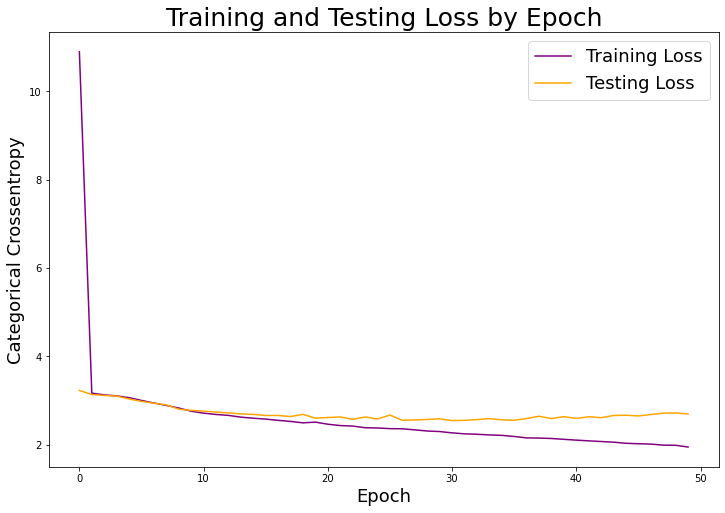

In [12]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt2.history['loss']
test_loss = history_alt2.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [13]:
# Evaluate model on test data.
score = model_alt2.evaluate(X_test_alt,
                       y_test_alt,
                       verbose=1)

labels = model_alt2.metrics_names

# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

182/182 [==============================] - 12s 65ms/step - loss: 2.6931 - accuracy: 0.2812
loss: 2.693131923675537
accuracy: 0.2811529040336609


In [14]:
model_alt3 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt3.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt3.add(MaxPooling2D(pool_size = (2, 2))) # ADDED MAX POOLING

model_alt3.add(Flatten(input_shape = (128, 128, 3)))
model_alt3.add(Dense(512, activation = 'relu'))
model_alt3.add(Dense(512, activation = 'relu'))
model_alt3.add(Dense(256, activation = 'relu'))

model_alt3.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt3  = model_alt3.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 25s 1s/step - loss: 3.5484 - accuracy: 0.1473 - val_loss: 3.0820 - val_accuracy: 0.1798
Epoch 2/50
24/24 [==============================] - 24s 1s/step - loss: 3.0454 - accuracy: 0.1840 - val_loss: 2.9834 - val_accuracy: 0.1968
Epoch 3/50
24/24 [==============================] - 24s 1s/step - loss: 2.9458 - accuracy: 0.2109 - val_loss: 2.9101 - val_accuracy: 0.2137
Epoch 4/50
24/24 [==============================] - 24s 1s/step - loss: 2.8738 - accuracy: 0.2257 - val_loss: 2.8230 - val_accuracy: 0.2406
Epoch 5/50
24/24 [==============================] - 24s 1s/step - loss: 2.7876 - accuracy: 0.2474 - val_loss: 2.7750 - val_accuracy: 0.2504
Epoch 6/50
24/24 [==============================] - 25s 1s/step - loss: 2.7393 - accuracy: 0.2529 - val_loss: 2.7813 - val_accuracy: 0.2365
Epoch 7/50
24/24 [==============================] - 24s 1s/step - loss: 2.7052 - accuracy: 0.2529 - val_loss: 2.7150 - val_accuracy: 0.2509
Epoch 8/50
24/24 [==

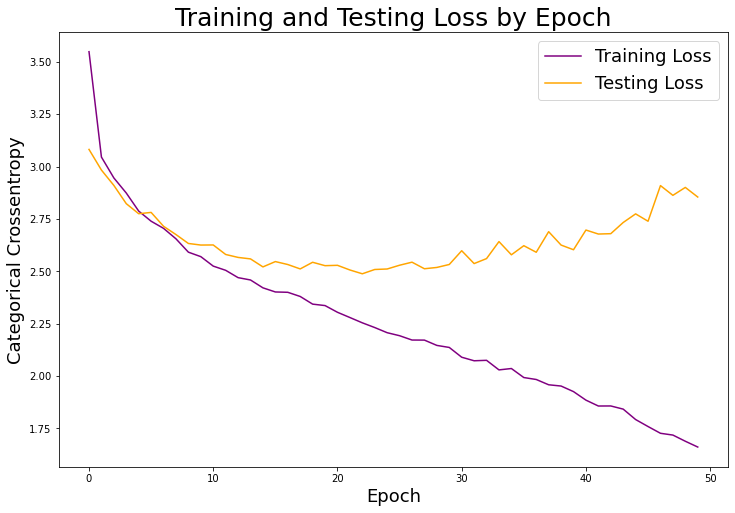

In [15]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt3.history['loss']
test_loss = history_alt3.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [16]:
model_alt4 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt4.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt4.add(MaxPooling2D(pool_size = (2, 2))) # ADDED MAX POOLING
model_alt4.add(Conv2D(16,                        # ADDED ADDITIONAL LAYER
                     kernel_size = (3, 3),
                     activation = 'relu'))
model_alt4.add(MaxPooling2D(pool_size=(2, 2)))
model_alt4.add(Flatten(input_shape = (128, 128, 3)))
model_alt4.add(Dense(512, activation = 'relu'))
model_alt4.add(Dense(512, activation = 'relu'))
model_alt4.add(Dense(256, activation = 'relu'))

model_alt4.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_alt4  = model_alt4.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 33s 1s/step - loss: 3.4963 - accuracy: 0.1156 - val_loss: 3.1475 - val_accuracy: 0.1536
Epoch 2/50
24/24 [==============================] - 30s 1s/step - loss: 3.1383 - accuracy: 0.1450 - val_loss: 3.1120 - val_accuracy: 0.1540
Epoch 3/50
24/24 [==============================] - 30s 1s/step - loss: 3.0899 - accuracy: 0.1583 - val_loss: 3.0377 - val_accuracy: 0.1736
Epoch 4/50
24/24 [==============================] - 48s 2s/step - loss: 2.9924 - accuracy: 0.1999 - val_loss: 2.9324 - val_accuracy: 0.2111
Epoch 5/50
24/24 [==============================] - 52s 2s/step - loss: 2.9012 - accuracy: 0.2157 - val_loss: 2.8545 - val_accuracy: 0.2335
Epoch 6/50
24/24 [==============================] - 55s 2s/step - loss: 2.8177 - accuracy: 0.2314 - val_loss: 2.8014 - val_accuracy: 0.2328
Epoch 7/50
24/24 [==============================] - 59s 2s/step - loss: 2.7252 - accuracy: 0.2521 - val_loss: 2.7501 - val_accuracy: 0.2492
Epoch 8/50
24/24 [==

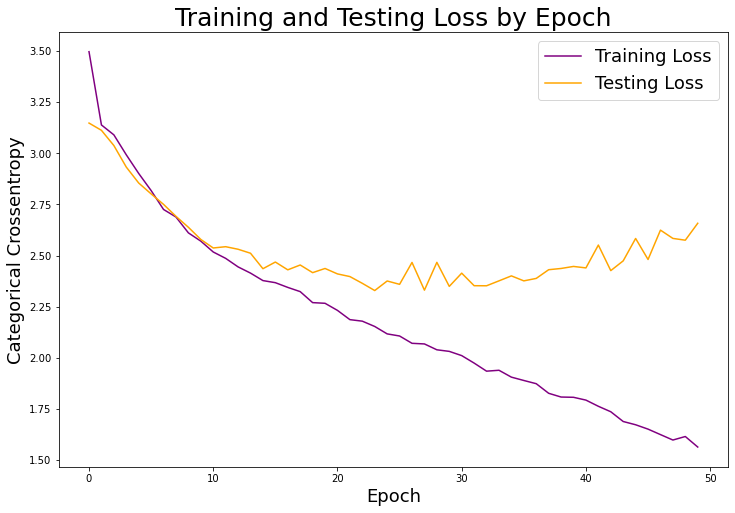

In [17]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt4.history['loss']
test_loss = history_alt4.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [18]:
#Models 3,4 were bad, so use model 2 as baseline 
model_alt5 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt5.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt5.add(Flatten(input_shape = (128, 128, 3)))    

model_alt5.add(Dense(512, activation = 'relu'))
model_alt5.add(Dense(512, activation = 'relu'))
model_alt5.add(Dense(256, activation = 'relu'))

model_alt5.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt5  = model_alt5.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 65s 3s/step - loss: 36.9933 - accuracy: 0.0696 - val_loss: 6.1544 - val_accuracy: 0.1217
Epoch 2/50
24/24 [==============================] - 55s 2s/step - loss: 4.0161 - accuracy: 0.1134 - val_loss: 3.2111 - val_accuracy: 0.1524
Epoch 3/50
24/24 [==============================] - 51s 2s/step - loss: 3.1463 - accuracy: 0.1562 - val_loss: 3.0762 - val_accuracy: 0.2007
Epoch 4/50
24/24 [==============================] - 51s 2s/step - loss: 3.0727 - accuracy: 0.1940 - val_loss: 3.0432 - val_accuracy: 0.1918
Epoch 5/50
24/24 [==============================] - 51s 2s/step - loss: 3.0452 - accuracy: 0.1974 - val_loss: 3.0339 - val_accuracy: 0.1985
Epoch 6/50
24/24 [==============================] - 52s 2s/step - loss: 3.0149 - accuracy: 0.1999 - val_loss: 2.9901 - val_accuracy: 0.2182
Epoch 7/50
24/24 [==============================] - 52s 2s/step - loss: 2.9881 - accuracy: 0.2102 - val_loss: 2.9853 - val_accuracy: 0.2182
Epoch 8/50
24/24 [=

In [19]:
#Model 4 used as baseline 

model_alt6 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt6.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt6.add(MaxPooling2D(pool_size = (3, 3))) # CHANGED MAX POOLING FROM 2 to 3
model_alt6.add(Conv2D(16,                        
                     kernel_size = (3, 3),
                     activation = 'relu'))
model_alt6.add(MaxPooling2D(pool_size=(2, 2)))
model_alt6.add(Flatten(input_shape = (128, 128, 3)))
model_alt6.add(Dense(512, activation = 'relu'))
model_alt6.add(Dropout(0.5))  #ADDED DROPOUT
model_alt6.add(Dense(512, activation = 'relu'))
model_alt6.add(Dropout(0.5))  #ADDED DROPOUT
model_alt6.add(Dense(256, activation = 'relu'))

model_alt6.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt6.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_alt6  = model_alt6.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=30,
                    verbose=1)

Epoch 1/30
24/24 [==============================] - 21s 781ms/step - loss: 3.2772 - accuracy: 0.1303 - val_loss: 3.1507 - val_accuracy: 0.1536
Epoch 2/30
24/24 [==============================] - 19s 816ms/step - loss: 3.1112 - accuracy: 0.1496 - val_loss: 3.0775 - val_accuracy: 0.1907
Epoch 3/30
24/24 [==============================] - 21s 863ms/step - loss: 3.0630 - accuracy: 0.1772 - val_loss: 2.9972 - val_accuracy: 0.1924
Epoch 4/30
24/24 [==============================] - 22s 938ms/step - loss: 3.0039 - accuracy: 0.1894 - val_loss: 2.9635 - val_accuracy: 0.2094
Epoch 5/30
24/24 [==============================] - 22s 912ms/step - loss: 2.9502 - accuracy: 0.2094 - val_loss: 2.8941 - val_accuracy: 0.2209
Epoch 6/30
24/24 [==============================] - 20s 843ms/step - loss: 2.9137 - accuracy: 0.2127 - val_loss: 2.8113 - val_accuracy: 0.2434
Epoch 7/30
24/24 [==============================] - 19s 790ms/step - loss: 2.8394 - accuracy: 0.2309 - val_loss: 2.7886 - val_accuracy: 0.2378

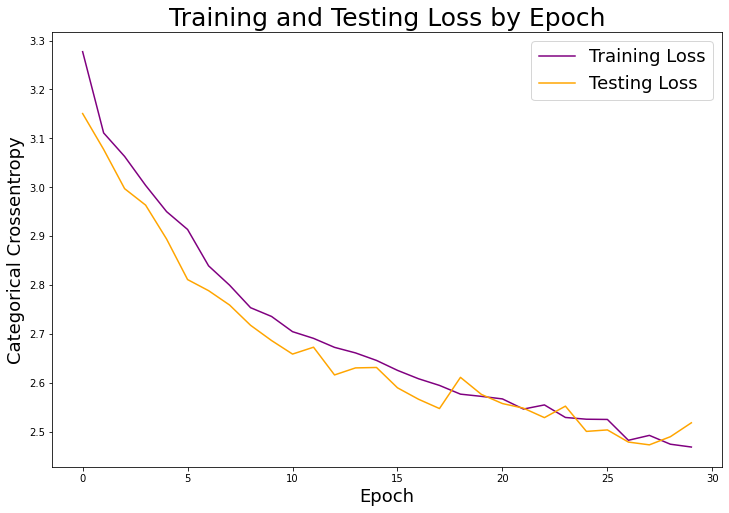

In [20]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt6.history['loss']
test_loss = history_alt6.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [21]:
#Model 6 used as baseline 

model_alt7 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt7.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt7.add(MaxPooling2D(pool_size = (3, 3))) # CHANGED MAX POOLING FROM 2 to 3
model_alt7.add(Conv2D(16,                        
                     kernel_size = (3, 3),
                     activation = 'relu'))
model_alt7.add(MaxPooling2D(pool_size=(3, 3)))
model_alt7.add(Flatten(input_shape = (128, 128, 3)))
model_alt7.add(Dense(512, activation = 'relu'))
model_alt7.add(Dropout(0.5))  #ADDED DROPOUT
model_alt7.add(Dense(512, activation = 'relu'))
model_alt7.add(Dropout(0.5))  #ADDED DROPOUT
model_alt7.add(Dense(256, activation = 'relu'))
model_alt7.add(Dropout(0.2))  #ADDED DROPOUT
model_alt7.add(Dense(128, activation = 'relu'))
model_alt7.add(Dropout(0.2))  #ADDED DROPOUT
model_alt7.add(Dense(128, activation = 'relu'))

model_alt7.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt7.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_alt7  = model_alt6.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 22s 930ms/step - loss: 2.4608 - accuracy: 0.3043 - val_loss: 2.4527 - val_accuracy: 0.3112
Epoch 2/50
24/24 [==============================] - 21s 868ms/step - loss: 2.4679 - accuracy: 0.3021 - val_loss: 2.4937 - val_accuracy: 0.3013
Epoch 3/50
24/24 [==============================] - 19s 807ms/step - loss: 2.4615 - accuracy: 0.3030 - val_loss: 2.4531 - val_accuracy: 0.3139
Epoch 4/50
24/24 [==============================] - 18s 766ms/step - loss: 2.4148 - accuracy: 0.3130 - val_loss: 2.4546 - val_accuracy: 0.3077
Epoch 5/50
24/24 [==============================] - 18s 771ms/step - loss: 2.4353 - accuracy: 0.3028 - val_loss: 2.4517 - val_accuracy: 0.3107
Epoch 6/50
24/24 [==============================] - 19s 809ms/step - loss: 2.4333 - accuracy: 0.3075 - val_loss: 2.3994 - val_accuracy: 0.3210
Epoch 7/50
24/24 [==============================] - 21s 871ms/step - loss: 2.4244 - accuracy: 0.3073 - val_loss: 2.4355 - val_accuracy: 0.3124

In [22]:
IMG_SIZE = (128, 128, 3)

In [23]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE 
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
#base_model.summary()

In [24]:
# Add in new model for transfer learning
model_alt8 = Sequential([ base_model,
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

model_alt8.add(Flatten(input_shape = (128, 128, 3)))
model_alt8.add(Dense(512, activation = 'relu'))
model_alt8.add(Dropout(0.5))  #ADDED DROPOUT
model_alt8.add(Dense(512, activation = 'relu'))
model_alt8.add(Dropout(0.5))  #ADDED DROPOUT
model_alt8.add(Dense(256, activation = 'relu'))
model_alt8.add(Dropout(0.2))  #ADDED DROPOUT
model_alt8.add(Dense(128, activation = 'relu'))
model_alt8.add(Dropout(0.2))  #ADDED DROPOUT
model_alt8.add(Dense(128, activation = 'relu'))

model_alt8.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt8.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_alt8.trainable = True
history_alt8  = model_alt8.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 57s 2s/step - loss: 3.3203 - accuracy: 0.1578 - val_loss: 2.8532 - val_accuracy: 0.3143
Epoch 2/50
24/24 [==============================] - 65s 3s/step - loss: 2.7810 - accuracy: 0.2569 - val_loss: 2.5411 - val_accuracy: 0.3093
Epoch 3/50
24/24 [==============================] - 67s 3s/step - loss: 2.5799 - accuracy: 0.2916 - val_loss: 2.3466 - val_accuracy: 0.3438
Epoch 4/50
24/24 [==============================] - 24495s 1065s/step - loss: 2.4326 - accuracy: 0.3208 - val_loss: 2.2165 - val_accuracy: 0.3876
Epoch 5/50
24/24 [==============================] - 52s 2s/step - loss: 2.2703 - accuracy: 0.3539 - val_loss: 2.0572 - val_accuracy: 0.4256
Epoch 6/50
24/24 [==============================] - 55s 2s/step - loss: 2.1542 - accuracy: 0.3752 - val_loss: 1.9152 - val_accuracy: 0.4534
Epoch 7/50
24/24 [==============================] - 54s 2s/step - loss: 2.0383 - accuracy: 0.4084 - val_loss: 1.8566 - val_accuracy: 0.4815
Epoch 8/50
24/

KeyboardInterrupt: 

In [ ]:
history_full=[
("Run 5",history_alt5.history['accuracy'][-1], history_alt5.history['val_accuracy'][-1]),
("Run 6",history_alt6.history['accuracy'][-1], history_alt6.history['val_accuracy'][-1])
]
history_full

In [ ]:
df = pd.DataFrame(history_full, columns=['Name','Training Accuracy', 'Testing Accuracy'])

df.head()

## Confusion Matrix

In [ ]:
# Prep data for confusion matrix
predictions=model7.predict(X_test) 
pred_f=np.argmax(predictions,axis=1)
y_test_f=np.argmax(y_test,axis=1)

In [ ]:
cm = metrics.confusion_matrix(y_test_f, pred_f)
cm

In [ ]:
class_names=[
"Alaudidae",
"Alcedinidae",
"Alcidae",
"Anatidae",
"Bombycillidae",
"Caprimulgidae",
"Cardinalidae",
"Certhiidae",
"Corvidae",
"Cuculidae",
"Diomedeidae",
"Fregatidae",
"Fringillidae",
"Gaviidae",
"Hirundinidae",
"Icteridae",
"Icteriidae",
"Laniidae",
"Laridae",
"Mimidae",
"Motacillidae",
"Parulidae",
"Passerellidae",
"Pelecanidae",
"Phalacrocoracidae",
"Picidae",
"Podicipedidae",
"Procellariidae",
"Sittidae",
"Stercorariidae",
"Sturnidae",
"Trochilidae",
"Troglodytidae",
"Tyrannidae",
"Vireonidae"]

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot();